In [50]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

custom_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']

# Set the custom color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)


In [51]:
!pip install jinja2



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


    size  thread_count         time
0   1000             1  165759736.0
4   1000             2   94964211.0
21  1000             4   53261405.0
6   1000             8   36013835.0
8   1000            16   31854239.0
37  1000            32   40510341.0
    size  thread_count          time
1   2000             1  1.288181e+09
24  2000             2  7.024577e+08
11  2000             4  3.711157e+08
20  2000             8  2.126522e+08
3   2000            16  1.351073e+08
38  2000            32  1.430111e+08
    size  thread_count          time
22  3000             1  5.425425e+09
9   3000             2  2.791002e+09
2   3000             4  1.571774e+09
12  3000             8  9.733350e+08
18  3000            16  5.638124e+08
39  3000            32  4.140034e+08
    size  thread_count          time
17  4000             1  1.467589e+10
23  4000             2  7.504314e+09
19  4000             4  4.310416e+09
13  4000             8  2.727522e+09
10  4000            16  2.222559e+09
36  4000

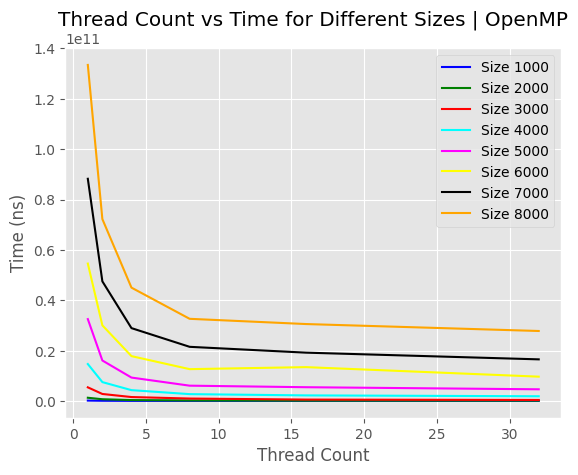

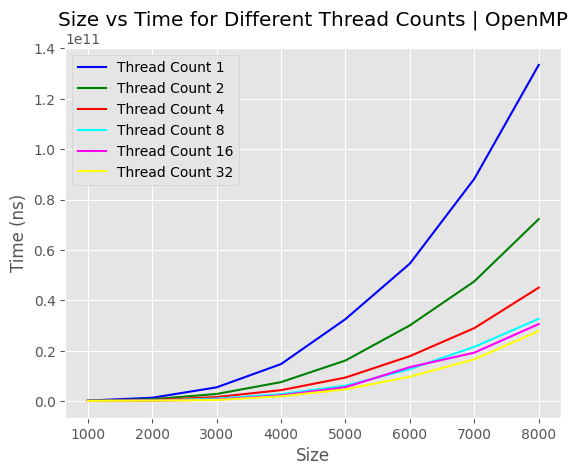

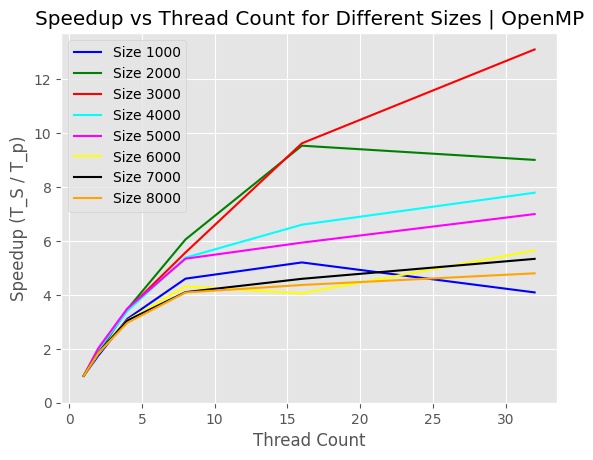

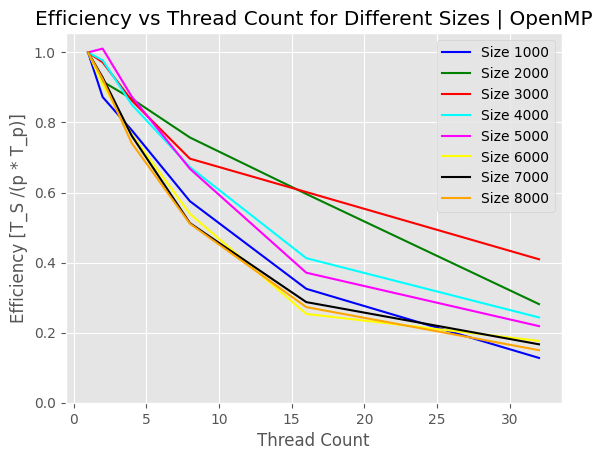

In [52]:
df = pd.read_csv('output_openmp_local.csv', names=['size', 'thread_count', 'time'])

# Get unique sizes
sizes = sorted(df['size'].unique())

# Plot thread_count vs time for each size
for size in sizes:
    subset = df[df['size'] == size]
    subset = subset.sort_values(by='thread_count')  # Sort by thread_count

    print(subset)
    
    plt.plot(subset['thread_count'], subset['time'], label=f'Size {size}')

# Add labels and title
plt.xlabel('Thread Count')
plt.ylabel('Time (ns)')
plt.title('Thread Count vs Time for Different Sizes | OpenMP')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Get unique thread counts
thread_counts = sorted(df['thread_count'].unique())


# Plot size vs time for each thread count
for thread_count in thread_counts:
    subset = df[df['thread_count'] == thread_count]
    subset_sorted = subset.sort_values(by='size')  # Sort by size
    plt.plot(subset_sorted['size'], subset_sorted['time'], label=f'Thread Count {thread_count}')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Time (ns)')
plt.title('Size vs Time for Different Thread Counts | OpenMP')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

for size in sizes:
    size_data = df[df['size'] == size]
    single_thread_time = size_data[size_data['thread_count'] == 1]['time'].values[0]  # Time for single-threaded execution

    speedup_values = []
    for thread_count in thread_counts:
        parallel_time = size_data[size_data['thread_count'] == thread_count]['time'].values[0]
        speedup = single_thread_time / parallel_time
        speedup_values.append(speedup)

    plt.plot(thread_counts, speedup_values, label=f'Size {size}')

plt.xlabel('Thread Count')
plt.ylabel('Speedup (T_S / T_p)')
plt.title('Speedup vs Thread Count for Different Sizes | OpenMP')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

plt.show()


for size in sizes:
    size_data = df[df['size'] == size]
    single_thread_time = size_data[size_data['thread_count'] == 1]['time'].values[0]  # Time for single-threaded execution

    speedup_values = []
    for thread_count in thread_counts:
        parallel_time = size_data[size_data['thread_count'] == thread_count]['time'].values[0]
        speedup = single_thread_time / (parallel_time * thread_count)
        speedup_values.append(speedup)

    plt.plot(thread_counts, speedup_values, label=f'Size {size}')

plt.xlabel('Thread Count')
plt.ylabel('Efficiency [T_S /(p * T_p)]')
plt.title('Efficiency vs Thread Count for Different Sizes | OpenMP')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)

plt.show()



In [53]:
df['time'] = (df['time'] / 1e9).round(2)

# Pivot the DataFrame
pivot_df = df.pivot(index='size', columns='thread_count', values='time')

# pivot_df.to_latex('output_openmp_local.tex',
                #   )
                
latex_table = pivot_df.to_latex(
    float_format="%.2f",  # Specify the format for floating-point numbers
    caption="Data for Different Thread Counts and Input Sizes",  # Caption for the table
    label="tab:data",  # Label for referencing the table
    column_format="c" * (len(pivot_df.columns) + 1)  # Specify the column format
)

print(latex_table)

\begin{table}
\caption{Data for Different Thread Counts and Input Sizes}
\label{tab:data}
\begin{tabular}{ccccccc}
\toprule
thread_count & 1 & 2 & 4 & 8 & 16 & 32 \\
size &  &  &  &  &  &  \\
\midrule
1000 & 0.17 & 0.09 & 0.05 & 0.04 & 0.03 & 0.04 \\
2000 & 1.29 & 0.70 & 0.37 & 0.21 & 0.14 & 0.14 \\
3000 & 5.43 & 2.79 & 1.57 & 0.97 & 0.56 & 0.41 \\
4000 & 14.68 & 7.50 & 4.31 & 2.73 & 2.22 & 1.88 \\
5000 & 32.52 & 16.08 & 9.30 & 6.09 & 5.48 & 4.65 \\
6000 & 54.57 & 30.04 & 17.82 & 12.65 & 13.45 & 9.67 \\
7000 & 88.24 & 47.51 & 28.94 & 21.51 & 19.20 & 16.54 \\
8000 & 133.46 & 72.23 & 45.02 & 32.64 & 30.56 & 27.80 \\
\bottomrule
\end{tabular}
\end{table}



    size  thread_count          time
0   1000             1  2.440097e+08
4   1000             2  2.224753e+08
21  1000             4  2.717169e+08
6   1000             8  4.488656e+08
8   1000            16  8.748559e+08
37  1000            32  1.797046e+09
    size  thread_count          time
1   2000             1  1.467592e+09
24  2000             2  9.428412e+08
11  2000             4  9.186100e+08
20  2000             8  1.167753e+09
3   2000            16  1.929196e+09
38  2000            32  3.654766e+09
    size  thread_count          time
22  3000             1  5.609214e+09
9   3000             2  3.183704e+09
2   3000             4  2.448583e+09
12  3000             8  2.649989e+09
18  3000            16  3.541298e+09
39  3000            32  5.949244e+09
    size  thread_count          time
17  4000             1  1.508868e+10
23  4000             2  8.481418e+09
19  4000             4  6.432329e+09
13  4000             8  5.302929e+09
10  4000            16  6.326663e+09
3

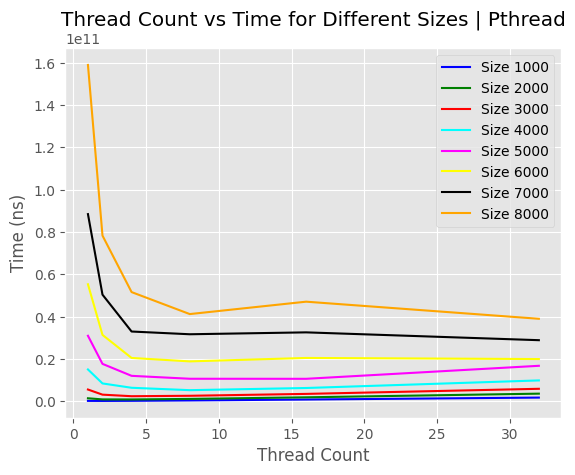

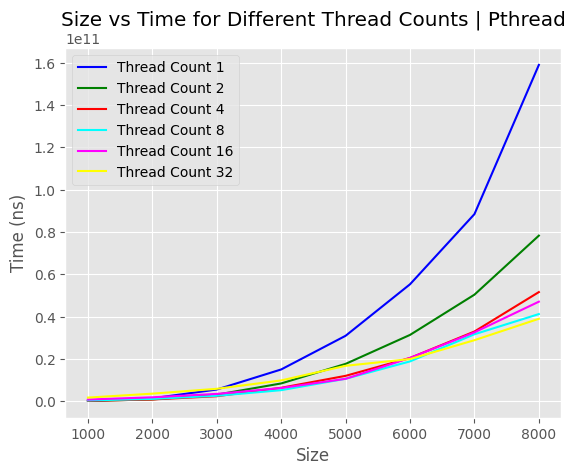

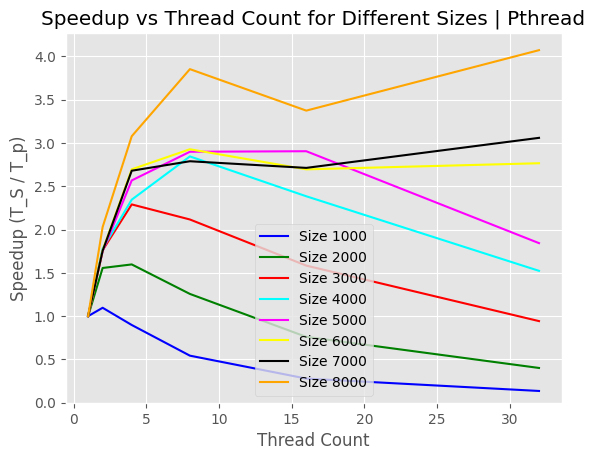

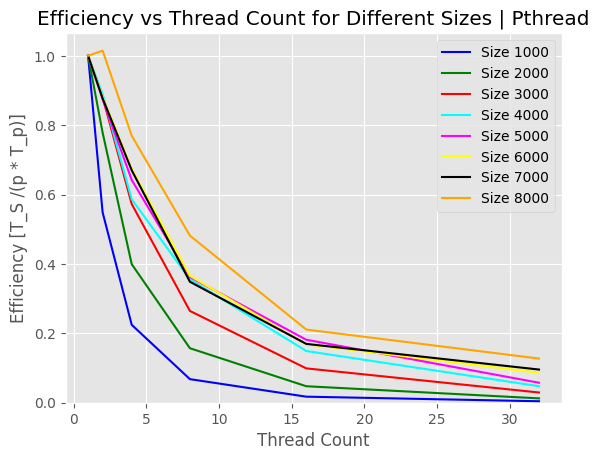

In [54]:
df = pd.read_csv('output_pthread_local.csv', names=['size', 'thread_count', 'time'])

# Get unique sizes
sizes = sorted(df['size'].unique())

# Plot thread_count vs time for each size
for size in sizes:
    subset = df[df['size'] == size]
    subset = subset.sort_values(by='thread_count')  # Sort by thread_count

    print(subset)
    
    plt.plot(subset['thread_count'], subset['time'], label=f'Size {size}')

# Add labels and title
plt.xlabel('Thread Count')
plt.ylabel('Time (ns)')
plt.title('Thread Count vs Time for Different Sizes | Pthread')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# Get unique thread counts
thread_counts = sorted(df['thread_count'].unique())


# Plot size vs time for each thread count
for thread_count in thread_counts:
    subset = df[df['thread_count'] == thread_count]
    subset_sorted = subset.sort_values(by='size')  # Sort by size
    plt.plot(subset_sorted['size'], subset_sorted['time'], label=f'Thread Count {thread_count}')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Time (ns)')
plt.title('Size vs Time for Different Thread Counts | Pthread')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


for size in sizes:
    size_data = df[df['size'] == size]
    single_thread_time = size_data[size_data['thread_count'] == 1]['time'].values[0]  # Time for single-threaded execution

    speedup_values = []
    for thread_count in thread_counts:
        parallel_time = size_data[size_data['thread_count'] == thread_count]['time'].values[0]
        speedup = single_thread_time / parallel_time
        speedup_values.append(speedup)

    plt.plot(thread_counts, speedup_values, label=f'Size {size}')

plt.xlabel('Thread Count')
plt.ylabel('Speedup (T_S / T_p)')
plt.title('Speedup vs Thread Count for Different Sizes | Pthread')
plt.legend()
plt.grid(True)

plt.ylim(bottom=0)

plt.show()


for size in sizes:
    size_data = df[df['size'] == size]
    single_thread_time = size_data[size_data['thread_count'] == 1]['time'].values[0]  # Time for single-threaded execution

    speedup_values = []
    for thread_count in thread_counts:
        parallel_time = size_data[size_data['thread_count'] == thread_count]['time'].values[0]
        speedup = single_thread_time / (parallel_time * thread_count)
        speedup_values.append(speedup)

    plt.plot(thread_counts, speedup_values, label=f'Size {size}')

plt.xlabel('Thread Count')
plt.ylabel('Efficiency [T_S /(p * T_p)]')
plt.title('Efficiency vs Thread Count for Different Sizes | Pthread')
plt.legend()
plt.grid(True)

plt.ylim(bottom=0)

plt.show()


In [55]:
df['time'] = (df['time'] / 1e9).round(2)

# Pivot the DataFrame
pivot_df = df.pivot(index='size', columns='thread_count', values='time')

# pivot_df.to_latex('output_openmp_local.tex',
                #   )
                
latex_table = pivot_df.to_latex(
    float_format="%.2f",  # Specify the format for floating-point numbers
    caption="Data for Different Thread Counts and Input Sizes",  # Caption for the table
    label="tab:data",  # Label for referencing the table
    column_format="c" * (len(pivot_df.columns) + 1)  # Specify the column format
)

print(latex_table)

\begin{table}
\caption{Data for Different Thread Counts and Input Sizes}
\label{tab:data}
\begin{tabular}{ccccccc}
\toprule
thread_count & 1 & 2 & 4 & 8 & 16 & 32 \\
size &  &  &  &  &  &  \\
\midrule
1000 & 0.24 & 0.22 & 0.27 & 0.45 & 0.87 & 1.80 \\
2000 & 1.47 & 0.94 & 0.92 & 1.17 & 1.93 & 3.65 \\
3000 & 5.61 & 3.18 & 2.45 & 2.65 & 3.54 & 5.95 \\
4000 & 15.09 & 8.48 & 6.43 & 5.30 & 6.33 & 9.90 \\
5000 & 31.00 & 17.72 & 12.07 & 10.69 & 10.67 & 16.81 \\
6000 & 55.33 & 31.41 & 20.52 & 18.90 & 20.52 & 20.00 \\
7000 & 88.46 & 50.42 & 33.01 & 31.71 & 32.61 & 28.91 \\
8000 & 158.94 & 78.31 & 51.63 & 41.25 & 47.10 & 39.03 \\
\bottomrule
\end{tabular}
\end{table}

